# **AllLife Bank Customer Segmentation**

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

In [2]:
# Let's install needed library
!pip install scikit-learn-extra

     |████████████████████████████████| 382 kB 4.1 MB/s eta 0:00:01


In [27]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [5]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Checking the info of the data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.** 

In [7]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has duplicate values.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

### **Question 1: Drop the rows with duplicate customer keys (2 Marks)**

In [9]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated()

data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [19]:
# let's drop duplicate keys

data = data.drop(index=data[duplicate_keys].index)

### **Dropping columns** 

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [21]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. Duplicates would mean customers with identical features.

In [23]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [24]:
data = data[~data.duplicated()]

In [25]:
data.shape

(644, 5)

**Observations:** 

After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

There are potential outliers in Avg_Credit_Limit

Avg_Credit_Limit
Skew : 2.19


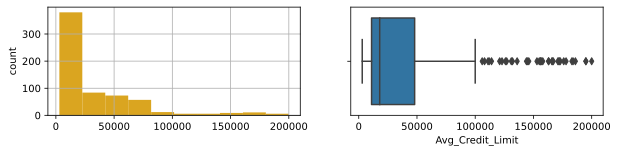

Total_Credit_Cards
Skew : 0.17


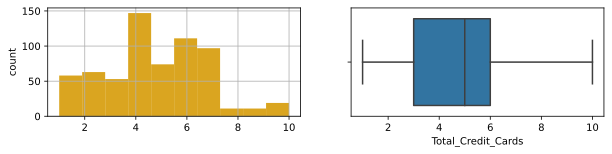

Total_visits_bank
Skew : 0.15


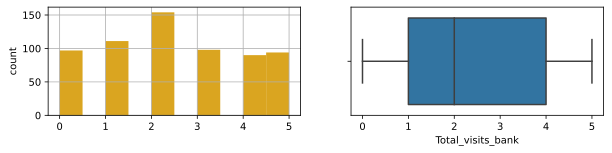

Total_visits_online
Skew : 2.21


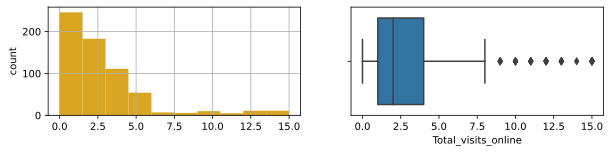

Total_calls_made
Skew : 0.65


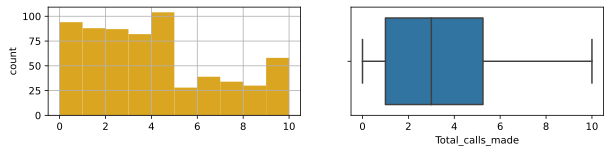

In [36]:
# Let's explore each variable at hand

for col in data.columns:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (10, 2))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(color='goldenrod')
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = col,data=data)
    
    plt.show()

**Observation:**

- All of the variables have right skewed distribution
- There are potential outliers in Avg_Credit_Limit and Total_visits_online

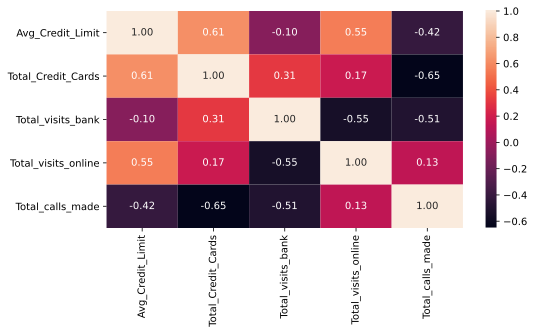

In [40]:
# Let's check the correlation between the variables

plt.figure(figsize = (8, 4))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

In [45]:
# Let's scale the data to make the variable ranges comparable
scaler = StandardScaler()

# Standardizing the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

In [43]:
# Let's apply PCA on the scaled data

from sklearn.decomposition import PCA

n = data.shape[1]

# Creating a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Let's save PCA components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [44]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

## **Data segmentation**

Let's try the K-means algorithm on our pca components and find out the optimum number of clusters to use.

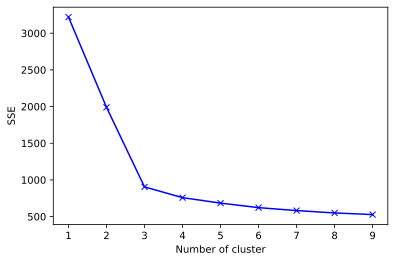

In [46]:
# Let's initialize a dictionary to store SSE for each K
sse = {} 

# Let's iterate for a range of Ks and fit the pca components to the algorithm
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_ 

# Let's plot the SSE vs K elbow curve
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observations:** 

- We see from the graph above that optimal number of clusters is 3
- **Store the predictions as 'Labels' to the 'data_copy' and 'data' DataFrames (2 Marks)**

In [54]:
kmeans = KMeans(n_clusters=3)                     
kmeans.fit(data_copy)                           

# Adding predicted labels to the original data and the copied data 
data_copy['Labels'] = kmeans.labels_     
data['Labels'] = kmeans.labels_            

Let's look at the various features based on the labels.

### **Let's Create the cluster profiles using summary statistics and box plots for each label**

In [55]:
# Number of observations in each cluster
data.Labels.value_counts()

0    374
1    221
2     49
Name: Labels, dtype: int64

In [64]:
mean

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,33893.048128,5.508021,3.489305,0.975936,1.997326
1,12239.819005,2.411765,0.945701,3.561086,6.891403
2,140102.040816,8.775510,0.591837,10.979592,1.102041


In [110]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

# To make the analysis more clear let's focus on median values which desribe the customer profiles better
median_index=['group_0 Median','group_1 Median','group_2 Median']
df_kmeans[original_features].loc[median_columns].sort_values(by='Avg_Credit_Limit').T

,group_1 Median,group_0 Median,group_2 Median
Avg_Credit_Limit,12000.0,31500.0,145000.0
Total_Credit_Cards,2.0,6.0,9.0
Total_visits_bank,1.0,3.0,1.0
Total_visits_online,4.0,1.0,11.0
Total_calls_made,7.0,2.0,1.0


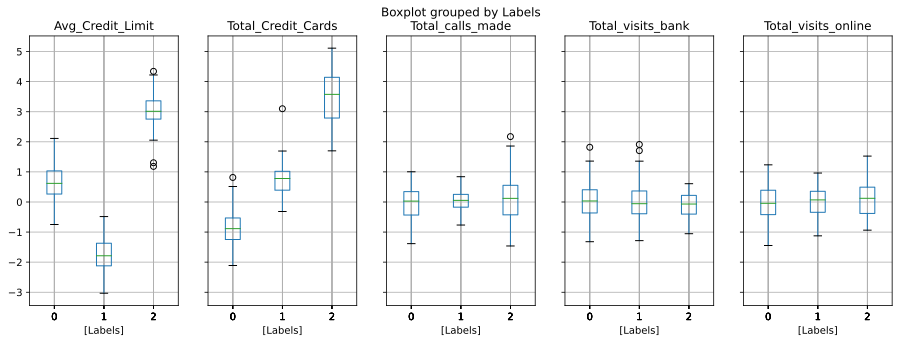

In [67]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (15, 5))

plt.show()

**Cluster Profiles:**

- As we defined above there are 3 distinct customer profiles
- **First group** (label 1) are customers with low credit limit (median=12,000) and low number of credit cards (median=2). So these are customers who use credit cards only for small purchases or occasionaly and probably  have tight spending budget. At the same customers of this profile tend to call to the bank more often (median=7 vs 2 & 1 for other groups). Thus these customers cause additional administrative costs to the bank. 
- **Second group** (label 0) are customers with moderate credit limit (median=31,500) and average number of credit cards (median=6). So these are customers with moderate spending budget who use several credit cards for their purchases. These people mostly visit bank in person.  
- **Third group** (label 2) are customers with high credit limit (median 145,000) and high number of credit cards (median=9). These are the customers who have high spending budget and variety of card for each situation. These people mostly visit the bank online.  


## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

In [69]:
gmm = GaussianMixture(n_components=3)

gmm.fit(data_pca)    

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [ ]:
GaussianMixture

In [70]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

2    374
1    221
0     49
Name: GmmLabels, dtype: int64

In [111]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

# To make the analysis more clear let's focus on median values which desribe the customer profiles better
df_gmm[original_features].loc[median_columns].sort_values(by='Avg_Credit_Limit').T

,group_1 Median,group_2 Median,group_0 Median
Avg_Credit_Limit,12000.0,31500.0,145000.0
Total_Credit_Cards,2.0,6.0,9.0
Total_visits_bank,1.0,3.0,1.0
Total_visits_online,4.0,1.0,11.0
Total_calls_made,7.0,2.0,1.0


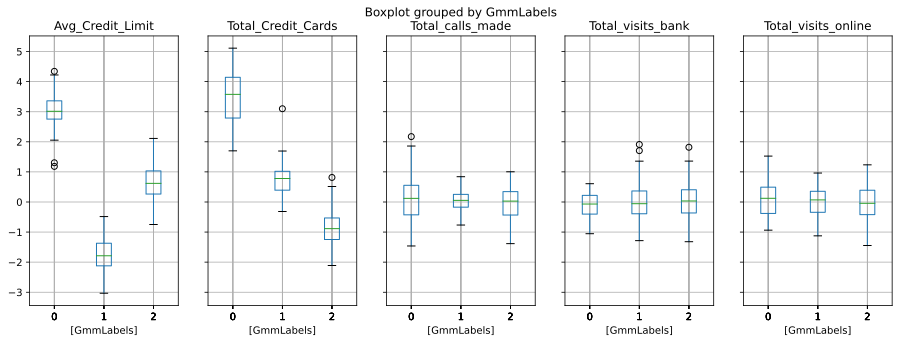

In [73]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (15, 5))

plt.show()

**Cluster Profiles:**

We see the same cluster profiles as defined by KMeans only the labels are mixed. 

## **K-Medoids**

In [86]:
data_pca.values.flags
data_values=data_pca.copy(deep=True).values
data_values=data_values.copy(order='C')

In [87]:
kmedo = KMedoids(n_clusters=3)     
kmedo.fit(data_pca)   

data_copy['kmedoLabels'] = kmedo.predict(data_values)

data['kmedoLabels'] = kmedo.predict(data_values)

In [88]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [112]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].loc[median_columns].sort_values(by='Avg_Credit_Limit').T

,group_0 Median,group_2 Median,group_1 Median
Avg_Credit_Limit,12000.0,20000.0,68000.0
Total_Credit_Cards,2.0,5.0,7.0
Total_visits_bank,1.0,4.0,2.0
Total_visits_online,4.0,1.0,2.0
Total_calls_made,7.0,2.0,2.0


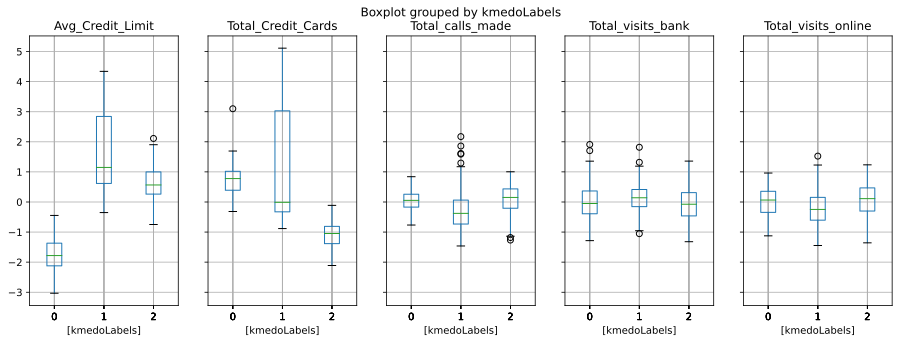

In [95]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (15, 5))

plt.show()

In [113]:
df_kmedoids[original_features].loc[median_columns].sort_values(by='Avg_Credit_Limit').T

,group_0 Median,group_2 Median,group_1 Median
Avg_Credit_Limit,12000.0,20000.0,68000.0
Total_Credit_Cards,2.0,5.0,7.0
Total_visits_bank,1.0,4.0,2.0
Total_visits_online,4.0,1.0,2.0
Total_calls_made,7.0,2.0,2.0


**Cluster Profiles:**

Let's see what profiles the K-Medoid method is giving us. 

1. Cluster 1 (label 0)is defined by customers who have low average limit (median 12,000) and low number of credit cards (median = 2). So these are customers who use credit cards only for small purchases or occasionaly and probably  have tight spending budget.  Also the customers of this profile tend to call to the bank more often (median=7 vs median for other profiles of 2) and thus create additional administrative costs for the bank.  
2. Cluser 2 (label 2) is defined by customers with moderate limit (median=20,000) and average number of credit cards (median=5). So these are customers with moderate spending budget who use several credit cards for their purchases. These people mostly visit bank in person.  
3. Cluster 3 (label 1) is defined by customers who have high average limit (median= 68,000) and high variability. At the same time this profile has average number of highest number of credit cards (median=7). 

Let's compare the clusters from K-Means and K-Medoids 

In [92]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,33893.048128,2.423423,5.508021,0.950450,3.489305,3.554054,0.975936,6.878378,1.997326
group_1 Mean,85052.631579,12239.819005,7.030075,2.411765,1.691729,0.945701,4.639098,3.561086,1.969925,6.891403
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,31500.000000,2.000000,6.000000,1.000000,3.000000,4.000000,1.000000,7.000000,2.000000
group_1 Median,68000.000000,12000.000000,7.000000,2.000000,2.000000,1.000000,2.000000,4.000000,2.000000,7.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Comparing Clusters:**

- We see that in general this method creates the clusters with the same description but values describing these profiles are quite different and labels are mixed. The most probable reason is that method is not prone to outliers.
- Another difference we see that people from profile number 3 are using personal visits, online visits and calls more or less equally and do not favor visiting online as it was defined by K-Means. 

### Recommendations:

1. From the analysis of clusters I recommend to target the 3 customer profiles described above.
2. We see that there is a clear pattern that the more credit cards a client has the more he or she tends to spend. So I propose to upsale the existing customers by proposing them new credit card which have different sets of features and different bonus/discount systems. 
3. To descrease administrative costs made by calls and visiting in person I propose to promote visiting bank online by profile 1 (low spending) and profile 2 (moderate spending).
4. To increase spending by all profiles I propose to create a marketing campaign with bonuses/discounts for corresponding spendings by each profile. 